In [1]:
!pip install ultralytics

In [2]:
import torch
torch.cuda.is_available()

False

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split"

train  val


In [29]:
# Optional: remove empty folders just in case
import os, shutil
for root, dirs, files in os.walk("/content/blood_cell_images_split", topdown=False):
    for d in dirs:
        folder_path = os.path.join(root, d)
        if not os.listdir(folder_path):
            shutil.rmtree(folder_path)

In [30]:
import os
print(os.getcwd())

/content


In [31]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/blood_cell_images_split" /content/

In [32]:
import os
print(os.listdir("/content/blood_cell_images_split"))

['val', 'train']


In [33]:
image_extensions = (".png", ".jpg", ".jpeg")

# Get only class folders (ignore .DS_Store or any files)
def get_class_folders(split_path):
    return sorted([d for d in os.listdir(split_path) if os.path.isdir(os.path.join(split_path, d))])

for split in ["train", "val"]:
    split_path = f"/content/blood_cell_images_split/{split}"
    classes = get_class_folders(split_path)
    print(f"\nChecking {split_path}:")
    for cls in classes:
        cls_path = os.path.join(split_path, cls)
        num_images = len([f for f in os.listdir(cls_path) if f.lower().endswith(image_extensions)])
        print(f" - {cls}: {num_images} images")


Checking /content/blood_cell_images_split/train:
 - .DS_Store: 0 images
 - basophil: 800 images
 - erythroblast: 800 images
 - monocyte: 800 images
 - myeloblast: 800 images
 - seg_neutrophil: 800 images

Checking /content/blood_cell_images_split/val:
 - .DS_Store: 0 images
 - basophil: 200 images
 - erythroblast: 200 images
 - monocyte: 200 images
 - myeloblast: 200 images
 - seg_neutrophil: 200 images


In [34]:
!find /content/blood_cell_images_split/ -name ".DS_Store" -type f -delete

In [35]:
# Double-check classes again
train_path = "/content/blood_cell_images_split/train"
print("Classes YOLO will see:", os.listdir(train_path))

Classes YOLO will see: ['monocyte', 'erythroblast', 'basophil', '.DS_Store', 'myeloblast', 'seg_neutrophil']


In [36]:
val_path = "/content/blood_cell_images_split/val"
print("Classes YOLO will see:", os.listdir(val_path))

Classes YOLO will see: ['monocyte', 'erythroblast', 'basophil', '.DS_Store', 'myeloblast', 'seg_neutrophil']


In [37]:
from ultralytics import YOLO

# Load YOLO classification model (nano version is small/fast)
model = YOLO("yolov8n-cls.pt")

# Train
model.train(
    data="/content/blood_cell_images_split",
    epochs=10,
    imgsz=224,
    batch=128
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=128, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/blood_cell_images_split, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, 

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e50d0f80b60>
curves: []
curves_results: []
fitness: 0.9995000064373016
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9990000128746033, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9995000064373016}
save_dir: PosixPath('/content/runs/classify/train')
speed: {'preprocess': 0.00016917799985094462, 'inference': 15.097996401000273, 'loss': 7.766000635456294e-06, 'postprocess': 1.8720998923527077e-05}
task: 'classify'
top1: 0.9990000128746033
top5: 1.0

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
# Run validation to get metrics
metrics = model.val()

Ultralytics 8.3.204 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,442,566 parameters, 0 gradients, 3.3 GFLOPs
ERROR ❌ train: /content/blood_cell_images_split/train... found 4000 images in 5 classes (requires 6 classes, not 5)
ERROR ❌ val: /content/blood_cell_images_split/val... found 1000 images in 5 classes (requires 6 classes, not 5)
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 697.2±274.3 MB/s, size: 17.3 KB)
val: Scanning /content/blood_cell_images_split/val... 1000 images, 0 corrupt: 100% ━━━━━━━━━━━━ 1000/1000 1.1Mit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 8/8 0.4it/s 18.1s
                   all      0.999          1
Speed: 0.0ms preprocess, 12.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/train2


In [40]:
# Get confusion matrix as numpy array
cm = metrics.confusion_matrix.matrix  # shape = (num_classes, num_classes)

In [41]:
# Convert to integers
cm_int = cm.astype(int)

In [42]:
# Get class names from the model
class_names = [model.names[i] for i in range(len(model.names))]

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [47]:
# cm_int: shape = (num_classes, num_classes)
num_classes = cm_int.shape[0]

In [51]:
class_names = [model.names[i] if i in model.names else f"class_{i}" for i in range(num_classes)]

In [59]:
# Path to the YOLOv8 training results
csv_path = "/content/runs/classify/train/results.csv"
loss_df = pd.read_csv(csv_path)

In [62]:
print(loss_df.columns)

Index(['epoch', 'time', 'train/loss', 'metrics/accuracy_top1',
       'metrics/accuracy_top5', 'val/loss', 'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [63]:
train_loss = loss_df['train/loss'].to_numpy()
val_loss   = loss_df['val/loss'].to_numpy()

In [64]:
train_acc = loss_df['metrics/accuracy_top1'].to_numpy()
val_acc   = loss_df['metrics/accuracy_top1'].to_numpy()

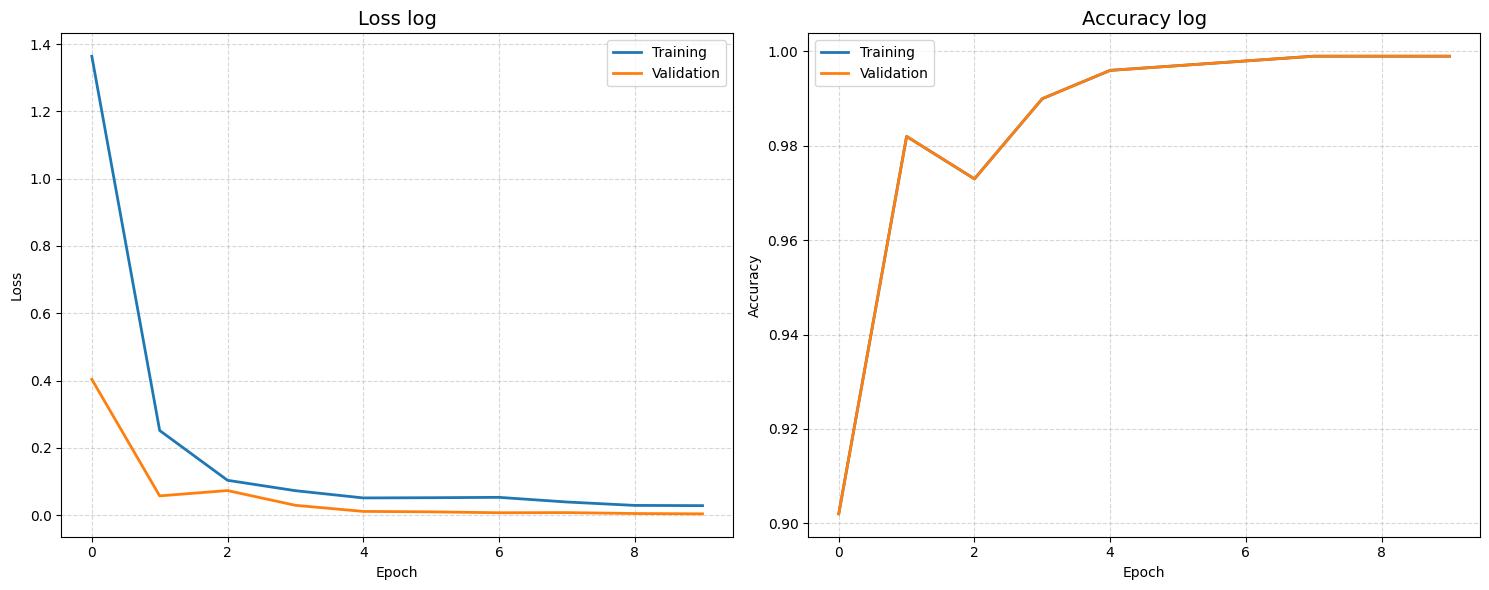

In [65]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 6))

# Loss log
axes[0].plot(train_loss, label="Training", color='tab:blue', linewidth=2)
axes[0].plot(val_loss, label="Validation", color='tab:orange', linewidth=2)
axes[0].set_title("Loss log", fontsize=14)
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.5)

# Accuracy log
axes[1].plot(train_acc, label="Training", color='tab:blue', linewidth=2)
axes[1].plot(val_acc, label="Validation", color='tab:orange', linewidth=2)
axes[1].set_title("Accuracy log", fontsize=14)
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

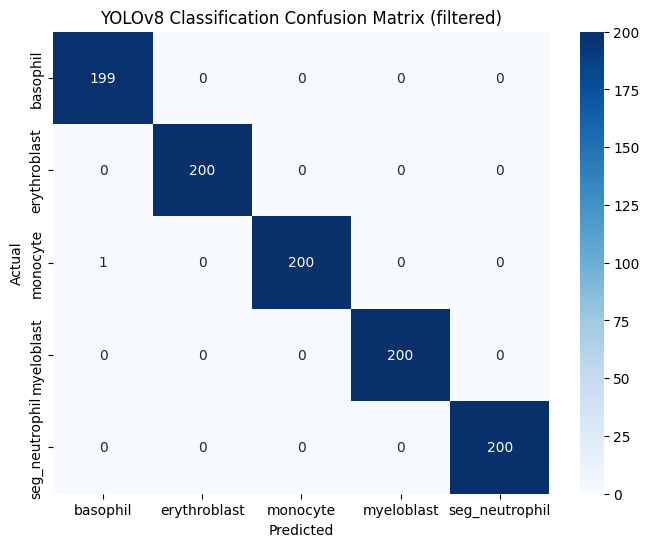

In [55]:
exclude_labels = [".DS_Store", "class_6"]
filtered_names = [name for name in class_names if name not in exclude_labels]
keep_indices = [i for i, name in enumerate(class_names) if name not in exclude_labels]

cm_filtered = cm_int[np.ix_(keep_indices, keep_indices)]

plt.figure(figsize=(8,6))
sns.heatmap(cm_filtered, annot=True, fmt='d', cmap='Blues',
            xticklabels=filtered_names, yticklabels=filtered_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('YOLOv8 Classification Confusion Matrix (filtered)')
plt.show()

In [56]:
precision = []
recall = []
f1 = []
support = cm_int.sum(axis=1)

for i in range(num_classes):
    tp = cm_int[i, i]
    fp = cm_int[:, i].sum() - tp
    fn = cm_int[i, :].sum() - tp

    prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1_score = 2*prec*rec / (prec+rec) if (prec+rec) > 0 else 0.0

    precision.append(prec)
    recall.append(rec)
    f1.append(f1_score)

# accuracy
accuracy = cm_filtered.trace() / cm_filtered.sum()

# macro avg
macro_precision = np.mean(precision)
macro_recall = np.mean(recall)
macro_f1 = np.mean(f1)
macro_support = support.sum()

# weighted avg
weighted_precision = np.sum(np.array(precision) * support) / support.sum()
weighted_recall = np.sum(np.array(recall) * support) / support.sum()
weighted_f1 = np.sum(np.array(f1) * support) / support.sum()
weighted_support = support.sum()

In [57]:
print("Classification Report (from confusion matrix):")
print(f"{'Class':<18} {'Precision':>9} {'Recall':>7} {'F1-Score':>9} {'Support':>7}")
for i, name in enumerate(filtered_names):
    print(f"{name:<18} {precision[i]:>9.2f} {recall[i]:>7.2f} {f1[i]:>9.2f} {support[i]:>7}")

print(f"\n{'Accuracy':<18} {accuracy:>9.2f} {'':>7} {'':>9} {support.sum():>7}")
print(f"{'Macro Avg':<18} {macro_precision:>9.2f} {macro_recall:>7.2f} {macro_f1:>9.2f} {macro_support:>7}")
print(f"{'Weighted Avg':<18} {weighted_precision:>9.2f} {weighted_recall:>7.2f} {weighted_f1:>9.2f} {weighted_support:>7}")

print("\nConfusion Matrix:")
print(cm_filtered)

Classification Report (from confusion matrix):
Class              Precision  Recall  F1-Score Support
basophil                0.00    0.00      0.00       0
erythroblast            0.99    1.00      1.00     199
monocyte                1.00    1.00      1.00     200
myeloblast              1.00    1.00      1.00     201
seg_neutrophil          1.00    1.00      1.00     200

Accuracy                1.00                      1000
Macro Avg               0.71    0.71      0.71    1000
Weighted Avg            1.00    1.00      1.00    1000

Confusion Matrix:
[[199   0   0   0   0]
 [  0 200   0   0   0]
 [  1   0 200   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


In [61]:
print("Overall metrics:")
print(f"Accuracy       : {accuracy:.3f}")
print(f"Macro Precision: {macro_precision:.3f}")
print(f"Macro Recall   : {macro_recall:.3f}")
print(f"Macro F1-score : {macro_f1:.3f}")
print(f"Weighted Precision: {weighted_precision:.3f}")
print(f"Weighted Recall   : {weighted_recall:.3f}")
print(f"Weighted F1-score : {weighted_f1:.3f}")

Overall metrics:
Accuracy       : 0.999
Macro Precision: 0.714
Macro Recall   : 0.714
Macro F1-score : 0.714
Weighted Precision: 0.999
Weighted Recall   : 0.999
Weighted F1-score : 0.999


In [71]:
# Save the trained model manually
model.save('/content/runs/classify/train2/best.pt')

# Download
from google.colab import files
files.download('/content/runs/classify/train2/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>